In [1]:
import sqlite3
import matplotlib.pyplot as plt

In [2]:
conn = sqlite3.connect('1000_richest_people.sqlite')
conn.row_factory = sqlite3.Row
c = conn.cursor()

In [3]:
# ამატებს შეყვანილ ინფორმაციას და ინდუსტრიას და კომპანიას თავისით უწერს
n_name = input("შეიყვანეთ სახელი")
n_country = input("შეიყვანეთ ქვეყანა")
n_networth = input("შეიყვანეთ ქონების რაოდენობა მილიარდებში")
c.execute('INSERT INTO tableName (Name, Country, "Net Worth (in billions)") VALUES (?, ?, ?)', (n_name, n_country, n_networth))
c.execute('UPDATE tableName SET Industry = "Technology" WHERE Name = ?', (n_name,))
c.execute('UPDATE tableName SET Company = "Google" WHERE Name = ?', (n_name,))

შეიყვანეთ სახელი Nikoloz Kurtanidze
შეიყვანეთ ქვეყანა Georgia
შეიყვანეთ ქონების რაოდენობა მილიარდებში 50


In [4]:
c.execute('DELETE FROM tableName WHERE Name = "Bill Gates"')

In [5]:
# იღებს იმ ადამიანების სიას რომლის ღირებულებაც 10 მილიარდზე მეტია. CAST() გამოყენებულია რადგან ქონება არის სტრინგის სახით
data = c.execute('SELECT * FROM tableName WHERE CAST("Net Worth (in billions)" AS REAL) > 10').fetchall()
all_data = []
for row in data:
    all_data.append(tuple(row))

In [6]:
conn.close()

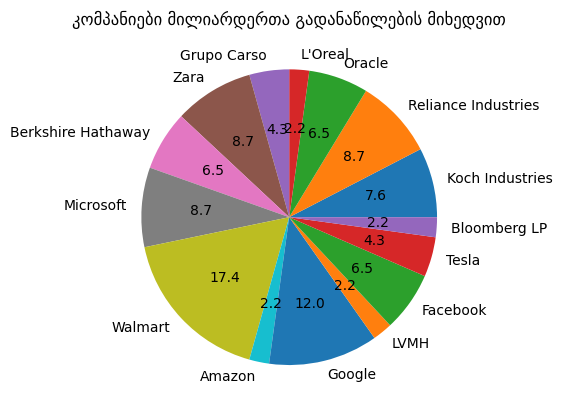

In [7]:
companies = []
for dt in all_data:
    companies.append(dt[4])

labels = set(companies)
sizes = []
for company in labels:
    sizes.append(companies.count(company))

fig, ax = plt.subplots()
ax.pie(sizes, labels=labels, autopct='%1.1f')
plt.title("კომპანიები მილიარდერთა გადანაწილების მიხედვით")
plt.show()

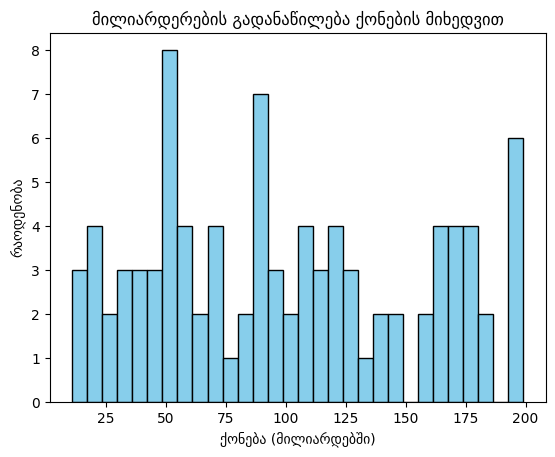

In [8]:
nt_worth = []
for each in all_data:
    nt_worth.append(float(each[3]))

plt.hist(nt_worth, bins=30, color='skyblue', edgecolor='black')
plt.title("მილიარდერების გადანაწილება ქონების მიხედვით")
plt.xlabel("ქონება (მილიარდებში)")
plt.ylabel("რაოდენობა")
plt.show()

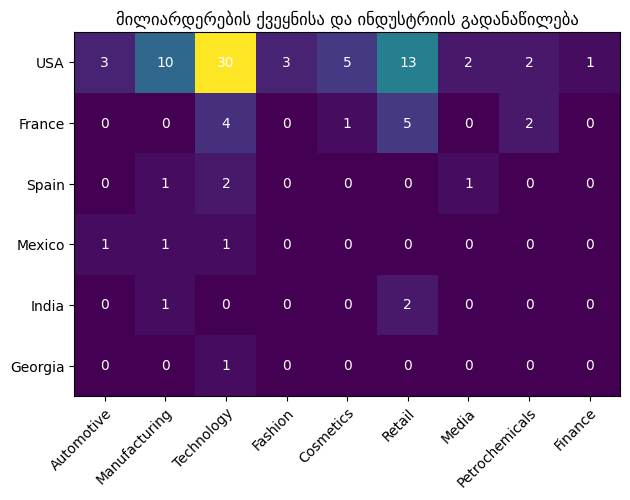

In [9]:
industries = []
countries = []

for each in all_data:
    if each[1] not in countries:
        countries.append(each[1])

    if each[2] not in industries:
        industries.append(each[2])


distribution = []
for i in range(len(countries)):
    row = []
    for j in range(len(industries)):
        row.append(0)

    distribution.append(row)

for each in all_data:
    distribution[countries.index(each[1])][industries.index(each[2])] += 1


fig, ax = plt.subplots()
im = ax.imshow(distribution)

ax.set_xticks(range(len(industries)), labels=industries,
              rotation=45, ha="right", rotation_mode="anchor")
ax.set_yticks(range(len(countries)), labels=countries)

for i in range(len(countries)):
    for j in range(len(industries)):
        text = ax.text(j, i, distribution[i][j],
                       ha="center", va="center", color="w")

ax.set_title("მილიარდერების ქვეყნისა და ინდუსტრიის გადანაწილება")
fig.tight_layout()
plt.show()